# Regularisation
This exercise assumes that you have read the tutorial about #link(regularisation and cross validation tutorial, url=03-tutorials/07/cv_sklearn). You will use regularisation on the basis of the cross validation results to mitigate the effects overfitting.

#task|reflect(easy, title="Reflection on the tutorial",coding=yes, theory=yes){

1. Run the cell in the tutorial implementing the hold-out train-validation split. 
2. Add a for-loop to rerun the code 20 times and store the $R^2$ results from each iteration. 
3. Calculate the mean and variance of the $R^2$ scores. Explain the results. 
4. Go back to the last part of tutorial and train the models with 3rd, 4th, and 5th order polynomials by using 10 fold cross validation. Does this affect the fit of the models? 
}

In [ ]:
# Add your solution here

#| solution <<
# change r-squared to something else in 2024
#| >>

## Overview
The following cell imports relevant libraries and sets up the dataset and model using the same configuration as in the tutorial:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # additional import for regularization

np.random.seed(99)

dataset = fetch_california_housing(as_frame=True)

df = dataset.frame # This is the dataframe (a table)

X = dataset.data # These are the input features (anything but the house price)
y = dataset.target # This contains the output features (just the house price)



## Regularization

#task|ride(medium, title=Implementing regularization, coding=yes){
In the tutorial, it was observed that incorporating the third or higher order polynomial features into a standard linear regression model leads to overfitting. In the following steps you will create a model pipeline similar to the one used in the tutorial using ridge regression.  


1. Create a third-order polynomial model with ridge regression (use the `Ridge` class imported from Scikit learn).
2. Use the `np.geomspace` function to create an array, `regularization_params`, with values exponentially spaced between $10^{-10}$ and $10^2$. These values will be used to vary the regularization parameter. 
3. Divide the dataset into training and validation sets using an 80-20 split. Train third-order Ridge regression models on the training set, by iterating over the elements in `regularization_params`. 
4. By calculating the $R^2$ scores asses the performance of the models on the validation set.

#note(class=info){Note: the regularization parameter $\lambda$ in the lectures is called alpha in sckit learn.}

5. Plot the $R^2$ score for each model (each regularization value). What does the plot tell you about the effect of the regularization parameter on the perfomance of the model on the testing set. 

#note(class=info){

Hint: It may be difficult to evaluate the small values. Use `plt.xscale('log')` to get evenly spaced points. }


}

1.00E-10,4.28E-10,1.83E-09,7.85E-09,3.36E-08,1.44E-07,6.16E-07,2.64E-06,1.13E-05,4.83E-05,2.07E-04,8.86E-04,3.79E-03,1.62E-02,6.95E-02,2.98E-01,1.27E+00,5.46E+00,2.34E+01,1.00E+02,

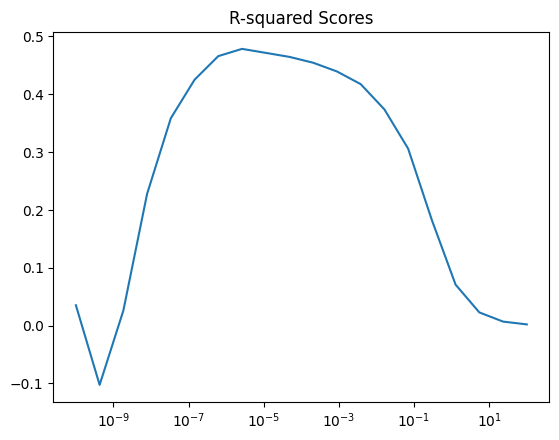

In [24]:
# Write your solution here

#| solution <<
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, train_size=0.8)
alphas = np.geomspace(1e-10, 1e2, 20)
scores = []
for a in alphas:
    print(f"{a:.2E}", end=",")
    model = Pipeline([
        ("features", PolynomialFeatures(3)), # Calculates the design matrix for a second order polynomial
        ("normalization", Normalizer()), # Normalizes the features to a (0, 1) range. 
        ("model", Ridge(alpha=a)), # The regression model
    ])
    
    model.fit(X_train, y_train)
    score_val=model.score(X_test, y_test)

    scores.append(score_val)
    

scores = np.array(scores)
plt.plot(alphas, scores)
plt.xscale('log')
plt.title('R-squared Scores')
plt.show()

#| >>

#task|eval(easy, title="Evaluating models (optional)", coding=yes){

In this task we test the different regularisation values by implementing the following steps:

1. Add a for-loop to rerun the code 20 times and store the $R^2$ results from each iteration. The loop should repeat the 80-20 hold-out train-validation split each time. 
2. Calculate and plot the mean and variance of the $R^2$ scores for each regularization value. Explain the results.

#note(class=info){

Hint: It may be difficult to evaluate the small values. Use `plt.xscale('log')` to get evenly spaced points. 

}

3. Based on the generated plots, which regularization parameter value gives the best results and why? Note down your observations and reflections in the text field below as it will be used in the next task.

}

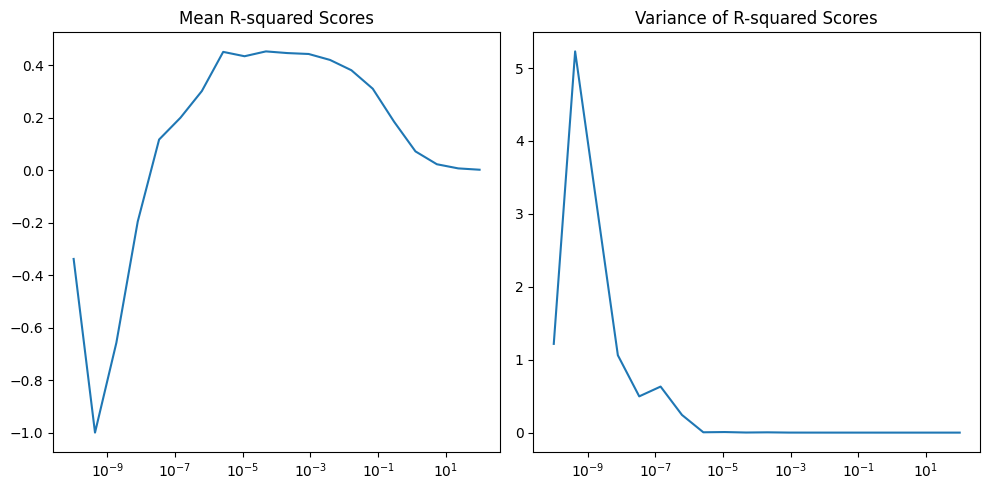

In [27]:
# Write your solution here

#| solution <<

alphas = np.geomspace(1e-10, 1e2, 20)
num_iterations = 20
all_scores = []

for a in alphas:
    scores = []
    model = Pipeline([
            ("features", PolynomialFeatures(3)),
            ("normalization", Normalizer()),
            ("model", Ridge(alpha=a)),
        ])
    
    for _ in range(num_iterations):
        X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, train_size=0.8)
        model.fit(X_train, y_train)
        score_val = model.score(X_test, y_test)
        scores.append(score_val)
    
    all_scores.append(scores)

# Calculate the mean and variance of R-squared scores for each alpha
mean_scores = np.mean(all_scores, axis=1)
variance_scores = np.var(all_scores, axis=1)

# Plot the mean and variance R-squared scores
plt.figure(figsize=(10, 5))  # Set the figure size
plt.subplot(1, 2, 1)  # Subplot 1 for Mean R-squared
plt.plot(alphas, mean_scores, label='Mean R-squared')
plt.xscale('log')
plt.title('Mean R-squared Scores')

plt.subplot(1, 2, 2)  # Subplot 2 for Variance
plt.plot(alphas, variance_scores, label='Variance')
plt.xscale('log')
plt.title('Variance of R-squared Scores')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()
#| >>


#task|cv(medium, title="Cross validation", coding=yes){

This task investigates model generalization using k-fold cross validation.

1. Construct a new model, with the same setup as before by using the optimal regularization parameter found in the previous task. 
2. Train the model using k-fold cross validation. Set the number of folds to 2.  
3. Vary the number of folds from 2 to 20 and store the mean and the standard deviation of the $R^2$ score for each fold. 
4. Plot the mean and the standard deviation of the $R^2$  scores.
5. (Optional) This task uses the `RepeatedKFold` function to obtain a more robust evaluation of model performance. `RepeatedKFold` repeats k-fold cross-validation 10 times by default. The folds are chosen randomly for each repetition. The runtime can be reduced by decreasing the number of repetitions (`n_repeats` parameter).

}

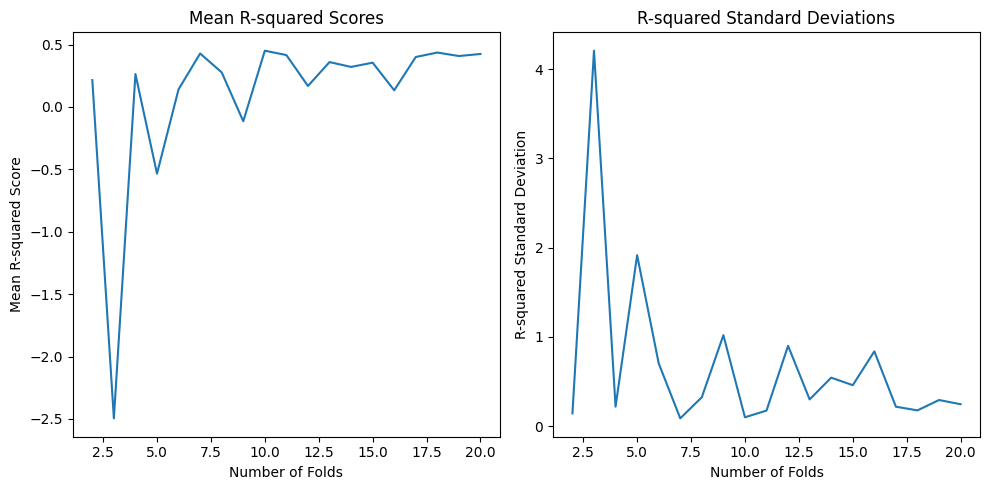

In [26]:
# Write your solution here
#| solution <<
model = Pipeline([
        ("features", PolynomialFeatures(3)), # Calculates the design matrix for a second order polynomial
        ("normalization", Normalizer()), # Normalizes the features to a (0, 1) range. 
        ("model", Ridge(alpha=1.43844989e-07)), # The regression model
    ])

def k_fold_cv(k):
    kfold = KFold(n_splits=k, shuffle=True) # 10 repeats by default; n_repeats gradually decreased to save time

    return cross_validate(
        model,
        dataset.data,
        dataset.target,
        cv=kfold, # This parameter determines the number of folds
        scoring="r2", # The scoring function used (higher is better, therefore the mse is negated)
        return_train_score=True,
        return_estimator=True,
    )

r2_vals = []
r2_std = []
for i in range(2, 21):
    res = k_fold_cv(i)
    r2_vals.append(res["test_score"].mean())
    r2_std.append(res["test_score"].std())
    
r2_vals = np.array(r2_vals)
r2_std = np.array(r2_std)

x = np.arange(2, 21)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, r2_vals)
plt.title('Mean R-squared Scores')
plt.xlabel('Number of Folds')
plt.ylabel('Mean R-squared Score')

# Plot the R-squared standard deviations
plt.subplot(1, 2, 2)
plt.plot(x, r2_std)
plt.title('R-squared Standard Deviations')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Standard Deviation')

plt.tight_layout()
plt.show()
#plt.fill_between(x, r2_vals+r2_std, r2_vals-r2_std)
#| >>

#task|reflection(medium, title="Reflection on results", reflection=yes){


1. Use the plotted mean and variance to argue for model performance. 
2. List reasons for the variability in model performance? 
3. Compare the variability in model perfomance observed in the tutorial with the results of the current exercise.
4. Argue how the regularized model performs compared to the standard linear regression implemented in the tutorial. 
     - Print the model parameters and use them to argue for differences between the linear model and the regularized model.

}